# First EDA - Team 19

Team 19
* Luis Henrique M O Imagiire
* Reinaldo Augusto D Sima
* Makoto Ikegame
* Natalia Sales Mesquita

EDA of the followin stores on ReclameAqui (27-03-2020 first 5 pages):
* tokestok-loja-online 
* tokestok 
* madeiramadeira 
* mobly 
* etna-home-store-loja-online 
* etna-home-store 
* casas-bahia-loja-online 
* casas-bahia-lojas-fisicas

## What questions will I be able to answer with this data?

Our MVP's target:
- Focus on answering customers' most frequent questions/problems
- Stores ranking
- Segmented analysis both online vs. bricks and mortar retailers
- Deliver a general snapshot of the vertical



## Reclame Aqui (RA) dataset sample

In [1]:
from util import agg_jsonls  # helper function
from pprint import pprint

reviewsRA = agg_jsonls("reclameaqui")
print(f"We have a total of {len(reviewsRA)} reviews!")
pprint(reviewsRA[0])

We have a total of 282 reviews!
{'business_name': 'Casas Bahia - Loja Online',
 'city': 'Araucária',
 'datetime': '2020-03-27T09:15:00Z',
 'description': 'Fiz a compra no dia 09-03-2020No dia 18-03-2020 recebi um '
                'email afirmando que o produto não poderia ser entregue, sem '
                'dar maiores explicações. Este fato por si só já gerou '
                'frustração. A mensagem afirmava que haveria o estrono do '
                'valor, no entanto a cobrança foi efetuada em minha fatura de '
                'cartão de crédito. Tentei por diversas vezes contato para '
                'resolver e as mensagens são sempre evazivas. Em chat com uma '
                'atendente, fui informado de 1 dia útil para contato, o que '
                'não ocorreu. Anexo algumas imagens.',
 'responses': {'business': [], 'customer': [], 'final': {}},
 'review_ID': '102035475',
 'tags': ['Estorno do valor pago',
          'Caixas de som e fone de ouvido',
          'Informáti

In [2]:
# Get an example of responses > 0
for review in reviewsRA:
    if "responses" in  review and len(review["responses"]["business"]) > 0:
        pprint(review)
        break

{'business_name': '',
 'city': 'São Paulo',
 'datetime': '2020-03-21T13:31:00Z',
 'description': 'Prezados,Ref.- o número do pedido COD 3CACRJ 99- produto - '
                'sofá 3l albany sued areia - data da compra 16/02/2020- data '
                'da suposta entrega 23/03/2020Liguei duas vezes na sexta feira '
                'dia 20 de março para confirmar se receberia o produto que '
                'comprei  - sofá.Não recebi nenhum protocolo de atendimento. '
                'Não tenho o números destes atendimentos. Para a minha '
                'surpresa fui informada no primeiro atendimento que o referido '
                'sofá não seria entregue na data programada. Que a entrega '
                'estaria programada para o dia 30 de março, e não dia 23 de '
                'março conforme informação passada na compra do produto. A '
                'ligação caiu.Na segunda ligação que realizei a atendente me '
                'disse que houve um problema com a minha ent

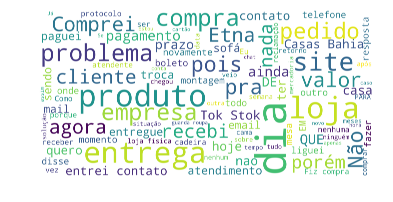

In [7]:
# word_cloud_text_SW = ' '.join(without_stop_words)

# wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
#                           scale = 10,width=800, height=400).generate(word_cloud_text_SW)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

### Count of complaints with response

In [4]:
reviews_with_response = [review for review in reviewsRA if "responses" in  review and len(review["responses"]["business"]) > 0]
reviews_with_no_response = [review for review in reviewsRA if "responses" in  review and len(review["responses"]["business"]) == 0]

print(f"Total of reviews with response {len(reviews_with_response)} [{round((len(reviews_with_response)/len(reviewsRA))*100, 2)}%]")
print(f"Total of reviews with NO response {len(reviews_with_no_response)} [{100- round((len(reviews_with_response)/len(reviewsRA))*100, 2)}%]")
print(f"We have a total of {len(reviewsRA)} reviews!")

Total of reviews with response 40 [14.18%]
Total of reviews with NO response 242 [85.82%]
We have a total of 282 reviews!


In [5]:
from datetime import datetime
import numpy as np
import pandas as pd


def extract_days_to_resolution(review):
    if "datetime" in review and "reply" in review["responses"]["final"]:
        init_dt = datetime.strptime(review["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        final_ans_dt = datetime.strptime(review["responses"]["final"]["reply"][0]["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        return (final_ans_dt - init_dt).days
    return np.nan


def extract_days_to_first_contact(review):
    if "datetime" in review and "business" in review["responses"] and len(review["responses"]["business"]) > 0:
        init_dt = datetime.strptime(review["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        final_ans_dt = datetime.strptime(review["responses"]["business"][0]["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        return (final_ans_dt - init_dt).days
    return np.nan


def format_RA_to_df(review):
    cols_for_df = ['title', 'description', 'business_name', 'uf', 'city', 'review_ID', 'datetime', 'timeCaptured']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["days_to_resolution"] = extract_days_to_resolution(review)
    r_cp["days_to_first_contact"] = extract_days_to_first_contact(review)
    r_cp["resolution_outcome"] = review["responses"]["final"]["result"] if "responses" in review and "final" in review["responses"] and "result" in review["responses"]["final"] else np.nan
    return r_cp
    

dff = pd.DataFrame([format_RA_to_df(row) for row in reviewsRA])
dff.head()


,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome
0,Compra cancelada pelo vendedor - Estorno não e...,Fiz a compra no dia 09-03-2020No dia 18-03-202...,Casas Bahia - Loja Online,PR,Araucária,102035475,2020-03-27T09:15:00Z,2020-03-27T12:16:27Z,NaN,NaN,NaN
1,Pontos TudoAzul não entraram,"Fiz 2 compras de R$ 699,00 cada na promoção de...",Casas Bahia - Loja Online,CE,Itapipoca,102030291,2020-03-26T23:44:00Z,2020-03-27T12:16:27Z,NaN,NaN,NaN
2,Possível [Editado pelo Reclame Aqui],"Olhando stories do meu instagram, até que uma ...",Casas Bahia - Loja Online,RJ,Rio de Janeiro,102030351,2020-03-26T23:47:00Z,2020-03-27T12:16:27Z,NaN,NaN,NaN
3,Fui informada que podia retirar o produto e fu...,Efetuei a compra do liquidificador mondial tur...,Casas Bahia - Loja Online,BA,Salvador,102030361,2020-03-26T23:48:00Z,2020-03-27T12:16:27Z,NaN,NaN,NaN
4,Atraso na Entrega,Eu fiz uma compra pelo site das Casas Bahia no...,Casas Bahia - Loja Online,BA,Salvador,102030421,2020-03-26T23:52:00Z,2020-03-27T12:16:27Z,NaN,NaN,NaN


**Correlation between average response time and whether or not a response was positive/negative.**

We lack more data where we have a "negative" resolution, but for those cases where we have a resolution we see that on average that takes one or two days to close.
We might dig deeper to understand what features these kind of complaints have in common.

In [6]:
dff.resolution_outcome = pd.Categorical(dff.resolution_outcome)
dff.groupby("resolution_outcome").mean()

,days_to_resolution,days_to_first_contact
resolution_outcome,,
positive,1.833333,1.666667


**Average time to company response and evaluating experience.**

On average, companies take 3 days to give the first reply. Also, when aggregating by days before contact, we have a hint that positive responses appear more frequently when the contact is made ealier on.

In [7]:
dff.describe()

,days_to_resolution,days_to_first_contact
count,6.000000,40.000000
mean,1.833333,3.025000
std,2.714160,2.485728
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,3.000000
75%,2.000000,5.250000
max,7.000000,8.000000


In [8]:
dff.groupby("days_to_first_contact").resolution_outcome.count()

days_to_first_contact
0.0    3
1.0    0
2.0    2
3.0    0
4.0    0
5.0    0
6.0    1
7.0    0
8.0    0
Name: resolution_outcome, dtype: int64

In [9]:
answered_perc = round(dff.days_to_first_contact.count()/dff.shape[0] * 100, 2) 
print(f"Total of answered complaints : {answered_perc}%")

Total of answered complaints : 14.18%


**Percentage of answered complaints by store**

In [10]:
aa = dff.groupby("business_name").count()
aa = round(aa.days_to_first_contact/aa.review_ID * 100, 2) 
pprint(aa)

business_name
                                 20.00
Casas Bahia - Loja Online         0.00
Casas Bahia - Lojas Físicas       0.00
Etna Home Store                  22.22
Etna Home Store - Loja Online    13.04
MadeiraMadeira                    0.00
Mobly                            41.38
Tok&Stok - Loja Física           34.29
Tok&Stok - Loja Online            6.38
dtype: float64


**Investigation of ' ' stores**

We see that it must been some sort of bug while scraping data from RA. We have descriptions pointing towards different stores, so it is not a single store problem.

In [11]:
dff.loc[dff["business_name"]=='']

,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome
23,MUDANÇA DA DATA DE ENTREGA - sem avisar o cons...,"Prezados,Ref.- o número do pedido COD 3CACRJ 9...",,SP,São Paulo,101820163,2020-03-21T13:31:00Z,2020-03-27T12:15:09Z,2.0,2.0,positive
63,mercadoria deixada na rua,Realizei uma compra no dia 16/03 com um frete ...,,SP,São Paulo,101999321,2020-03-26T11:59:00Z,2020-03-27T12:11:31Z,NaN,NaN,NaN
78,Não vieram entregar meu pedido e disseram que ...,"Deram o prazo de entrega para o dia 26/03, ai ...",,NaN,NaN,102025233,2020-03-26T20:47:00Z,2020-03-27T12:11:31Z,NaN,NaN,NaN
105,Atraso na entrega.,Comprei produto climatizador Cli70 29/11/2019 ...,,MG,Uberlândia,102025601,2020-03-26T20:56:00Z,2020-03-27T12:17:40Z,NaN,NaN,NaN
108,Descaso com consumidor,Estive na casa Bahia 2 de Lorena e comprei 2 r...,,SP,Lorena,102021395,2020-03-26T19:05:00Z,2020-03-27T12:17:44Z,NaN,NaN,NaN
120,CARNÊ COM DADOS DE CODIGO DE BARRAS DIVERGENTE,URGENTE!!!!!!!!!!!!!DIVERGENCIA NO CODIGO DE B...,,PE,Recife,102033995,2020-03-27T08:19:00Z,2020-03-27T12:17:44Z,NaN,NaN,NaN
138,MÁ QUALIDADE,Comprei um guarda-roupa das casas bahia no mês...,,SP,São Paulo,102010421,2020-03-26T15:24:00Z,2020-03-27T12:18:14Z,NaN,NaN,NaN
145,Até o momento não resolveram meu problema,fazem mais de 15 dias e até agora não vinheram...,,PB,João Pessoa,102019215,2020-03-26T18:18:00Z,2020-03-27T12:18:14Z,NaN,NaN,NaN
204,JÁ PAGUEI A FATURA E VÃO NEGATIVAR O MEU NOMVE,Fiz uma compra em novembro de 2019 na loja da ...,,RJ,Rio de Janeiro,101981957,2020-03-25T21:20:00Z,2020-03-27T12:08:14Z,NaN,NaN,NaN
263,Capa do encosto do sofá encolheu,"Olá, boa tarde.Comprei um sofá na TokStok ha m...",,SP,São Paulo,101827819,2020-03-21T18:33:00Z,2020-03-27T12:10:14Z,NaN,5.0,NaN


**Tag analysis**

In [12]:
unique_tags = set()
for review in reviewsRA:
    if "tags" in review:
        for tag in review["tags"]:
            unique_tags.add(tag)

print(f"We have {len(unique_tags)} unique tags!")
pprint(unique_tags)

We have 89 unique tags!
{'Aromatizantes e Difusores',
 'Assistência técnica e Garantia',
 'Atraso na entrega',
 'Brinquedos e jogos',
 'Caixas de som e fone de ouvido',
 'Cama, Mesa e Banho',
 'Camas e camas-box',
 'Canais de Atendimento',
 'Celular',
 'Celulares e Smartphones',
 'Climatizador de ar',
 'Colchões',
 'Cooktop',
 'Cortina',
 'Decoração',
 'Demora no reparo',
 'Desgaste prematuro',
 'Divergência de valores',
 'Eletrodomésticos',
 'Eletroeletrônicos',
 'Eletroportáteis',
 'Entrega',
 'Equipe de Atendimento',
 'Estofamento rasgado',
 'Estorno do valor pago',
 'Falta de peças',
 'Geladeira-Refrigerador',
 'Iluminação e Elétrica',
 'Informática',
 'Jogo de cama',
 'Lençol',
 'Liquidificadores',
 'Lixeiras',
 'Maquiagem de preço',
 'Marketplace',
 'Mau Atendimento',
 'Mau atendimento no SAC',
 'Mesa quebrada',
 'Mesas e Cadeiras',
 'Montagem',
 'Má qualidade do produto',
 'Móveis',
 'Móveis Modulados',
 'Móveis em Geral',
 'Móveis para Escritório',
 'Móveis para Jardim e Piscin

In [13]:
unique_tags = set()
unique_businesses = set()

for review in reviewsRA:
    unique_businesses.add(review['business_name'])
    if "tags" in review:
        for tag in review["tags"]:
            unique_tags.add(tag)

for review in reviewsRA:
        for tag in review["tags"]:
            unique_tags.add(tag)

tags_per_businesses = pd.DataFrame(0, columns = unique_businesses, index = unique_tags)

In [14]:
for review in reviewsRA:
    if "tags" in review:
        for tag in review['tags']:
            tags_per_businesses[review['business_name']][tag] += 1 
    
tags_per_businesses

,,Tok&Stok - Loja Online,Tok&Stok - Loja Física,Etna Home Store - Loja Online,Mobly,Etna Home Store,Casas Bahia - Loja Online,Casas Bahia - Lojas Físicas,MadeiraMadeira
Outro problema,5,18,7,10,6,14,9,20,6
Tapetes e Carpetes,0,0,0,1,0,2,0,0,0
Portas,0,0,0,0,0,0,0,0,1
Maquiagem de preço,0,0,0,0,1,0,0,0,0
Propaganda Enganosa,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Propaganda enganosa,0,1,2,0,0,0,0,1,2
Eletrodomésticos,1,0,0,0,0,0,3,2,0
Estofamento rasgado,0,0,0,0,1,0,0,0,0
Outro Tipo de produto/Serviço,4,18,7,10,6,14,9,18,6


### Filtering for customer support tags

In [22]:
problem_categories=['Assistência técnica e Garantia',
 'Atraso na entrega',
 'Canais de Atendimento',
 'Demora no reparo',
 'Desgaste prematuro',
 'Divergência de valores',
 'Entrega',
 'Equipe de Atendimento',
 'Estorno do valor pago',
 'Falta de peças',
 'Maquiagem de preço',
 'Mau Atendimento',
 'Mau atendimento no SAC',
 'Montagem',
 'Má qualidade do produto',
 'Não atende',
 'Não consigo agendar',
 'Não encontrei meu problema',
 'Outro problema',
 'Pernas quebradas',
 'Peças erradas',
 'Peças quebradas',
 'Problema com garantia estendida',
 'Problemas com o Atendimento',
 'Problemas com o Site',
 'Problemas na finalização da compra',
 'Produto com defeito',
 'Produto com peças faltando',
 'Produto errado',
 'Produto indisponível',
 'Produto não recebido',
 'Propaganda Enganosa',
 'Pé quebrado',
 'Qualidade do Produto',
 'Site fora do ar-Lento',
 'Troca-Devolução de produto',
 'Valor de frete']

tags_per_businesses.loc[problem_categories]

,,Tok&Stok - Loja Online,Tok&Stok - Loja Física,Etna Home Store - Loja Online,Mobly,Etna Home Store,Casas Bahia - Loja Online,Casas Bahia - Lojas Físicas,MadeiraMadeira
Assistência técnica e Garantia,0,0,5,2,1,0,0,0,3
Atraso na entrega,1,4,7,3,5,6,1,0,7
Canais de Atendimento,0,8,0,0,0,0,0,0,0
Demora no reparo,0,0,1,0,0,1,0,1,0
Desgaste prematuro,0,0,0,0,0,1,0,0,0
Divergência de valores,0,1,1,2,0,0,0,0,0
Entrega,0,0,0,2,1,4,0,0,0
Equipe de Atendimento,0,3,0,0,0,0,0,0,0
Estorno do valor pago,0,5,1,0,0,0,3,0,3
Falta de peças,0,0,0,0,0,1,0,0,0


## Google Business Store Dataset

In [19]:
reviewsGB = agg_jsonls("gbusiness")
print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 40 reviews!
{'caption': '',
 'id_review': 'ChZDSUhNMG9nS0VJQ0FnSUNjemJPSkR3EAEaFkNra0VkOHhNczE2WmVhRXRtWWZoanc',
 'n_photo_user': 0,
 'n_review_user': 0,
 'rating': 4.0,
 'relative_date': 'um dia atrás',
 'retrieval_date': '2020-03-21T15:38:25Z',
 'url_user': 'https://www.google.com/maps/contrib/112092464143644397071?hl=pt-BR',
 'username': 'Maria Gorete Veras Martins de Carvalho'}


In [22]:
caption_reviews = [i for i in reviewsGB if len(i["caption"]) > 0]

print(f"Reviews with caption: {round((len(caption_reviews) / len(reviewsGB))*100,2)}%")

Reviews with caption: 25.0%


In [24]:
pprint(caption_reviews[0:3])

[{'caption': '(Tradução do Google) Está bem  (Original) Ok',
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjMWVLaS1RRRABGhZkOTdseko4VG4yVzZyYUVPWkQ0TTln',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 5.0,
  'relative_date': '3 dias atrás',
  'retrieval_date': '2020-03-21T15:38:25Z',
  'url_user': 'https://www.google.com/maps/contrib/108919364759095568849?hl=pt-BR',
  'username': 'roberto boni'},
 {'caption': 'Sempre sou bem atendida.',
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjNVpuMW5RRRABGhZzcjhXRmlIYi1zaXAzLURfSDJuVHVn',
  'n_photo_user': 0,
  'n_review_user': 1,
  'rating': 5.0,
  'relative_date': '3 dias atrás',
  'retrieval_date': '2020-03-21T15:38:25Z',
  'url_user': 'https://www.google.com/maps/contrib/102183203056207578960?hl=pt-BR',
  'username': 'Rauana Cristina Salas Calvo'},
 {'caption': 'gostp somente dos eletrodomésticos',
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjcVlDem1RRRABGhZscGN4amx3NnJsSy1jdS1DbWxMbG9n',
  'n_photo_user': 0,
  'n_review_user': 20,
  'rating': 4.0,
  

In [28]:
# Average rates
print(f"Average grade {np.average([i['rating'] for i in reviewsGB])}")


Average grade 4.25


### General impressions - Google Business
Here we have less data to work with and most of them does not include a caption/description, so we might need a larger number of points to make a deep analysis. 
However, since this is not a complaint focused platform, we expect to have more positive responses from the users (and that can be seen by the 4.25 average rating of our sample data) - allowing us to draw a better overall picture of the store.


# First EDA conclusions

### EDA Statistics

We conclude that the majority (~86%) of the companies do not respond, but we also noticed that when spitted by company, there are differences between them (there are companies that do not respond at all). Regarding the most common problems, we see that the main problems are regarding customer support and delivery. From our word cloud and the n-grams analysis, we found that the most common words are those related to the problems ("atendimento" -> support, "entrega" -> delivery ...), reinforcing our previous findings.

### EDA data next steps

We found that we will need more data points in our final dataset, given that we want to do a deep analysis on every store. We want to have better estimates on response time and get data on negative conclusion (we only got positive conclusions in this sample). Thus, we will be scraping data every day from today onward. The data features are good, specially for ReclameAQUI data, we will have a broad feature space to build from the complaints description that will help to guide our ratings. For the Google Business data, we will adapt the scraper to store the geolocation of location. Additionally, as we are drawing from multiple sources (namely ReclameAQUI, Google Business and Facebook Reviews) that classify businesses differently, we will also have to look into how to aggregate data at different levels in order to achieve fruitful results.